# Read the dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataFrame = pd.read_pickle(r'../data/7587_corrige.pkl')
dataFrame.head()
#print(dataFrame.label.to_string())
#print(dataFrame.dtypes)

,companyName,companyUrl,jobTitle,dateRange,location,description,logoUrl,label
id,,,,,,,,
548398365_0,TEHTRIS,https://www.linkedin.com/company/tehtris/,R&D Cybersecurity Consultant,oct. 2021 – Aujourd’hui,"Bordeaux, Nouvelle-Aquitaine, France",None,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,NaN
548398365_1,CHEOPS TECHNOLOGY,https://www.linkedin.com/company/cheops-techno...,Ingénieur en data mining,sept. 2020 – sept. 2021,"Bordeaux, Nouvelle-Aquitaine, France",None,https://media-exp1.licdn.com/dms/image/C560BAQ...,2.0
551303934_0,ALTEN,https://www.linkedin.com/company/alten/,Stagiaire ingénieur en intelligence artificiel...,juil. 2021 – Aujourd’hui,"Rennes, Bretagne, France",Conception et programmation pour une plateform...,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,4.0
551303934_1,FRANCE SECURITE,https://www.linkedin.com/company/france-securite/,Stagiaire en développement logiciel,juin 2019 – août 2019,"Bordeaux, Aquitaine, France",Développement et mises à jour d’applications c...,https://media-exp1.licdn.com/dms/image/C4D0BAQ...,2.0
551303934_2,OASU (Observatoire Aquitain des Sciences de l'...,None,Stagiaire en développement Web,avr. 2018 – juin 2018,"Bordeaux, Aquitaine, France",Création et évolution d’une application Web d’...,,1.0


All fields are strings except for *label*, which is a float number.

- **id** : Work experience ID (unique) in the format *profileID_numWorkExperience* (e.g. 548398365_0: latest work experience of the user whose ID is 548398365).
- **companyName** : Company where the user has worked.
- **companyUrl** : URL of the LinkedIn page of the company.
- **jobTitle** : Work experience title.
- **dataRange** : Date range of the work experience in the format: *startDate - endDate · duration* or *date · duration* (if startDate = endDate) (e.g. sept. 2020 - déc. 2020 · 4 mois)
- **location** : Location of the work experience. Here there are only profiles with at least one work experience in one of the 5 cities in France : Bordeaux, Nice, Lille, Lyon and Strasbourg.
- **description** : Work experience description (under the job title of an experience on the user's profile)
- **logoUrl** : **This variable must be ignored**
- **label** : Work experience are labelled from 0 to 4.
	- **0**: This experience is not related to AI
	- **1**: It's unlikely that it's related to it
	- **2**: We don't know wether it's related or not to it
	- **3**: It's likely that it's related to it
	- **4**: It's related to AI
	- **NaN**: It's often a work experience that should be labelled between 0 and 2, so it's not a work experience related to AI

### Invalid values (empty strings, NaN...)

In this project we will use **jobTitle**, **description** and **label**.

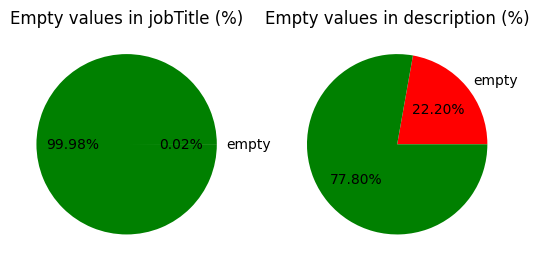

In [3]:
nanJobTitles = dataFrame["jobTitle"].isna().sum()
emptyJobTitles = (dataFrame["jobTitle"].values == '').sum()
nanDescriptions = dataFrame["description"].isna().sum()
emptyDescriptions = (dataFrame["description"].values == '').sum()

plt.subplot(1, 2, 1)
plt.pie([nanJobTitles+emptyJobTitles,len(dataFrame["jobTitle"])], labels=["empty",""],colors=['red','green'],autopct='%1.2f%%')
plt.title('Empty values in jobTitle (%)')
plt.subplot(1, 2, 2)
plt.pie([nanDescriptions+emptyDescriptions,len(dataFrame["description"])], labels=["empty",""],colors=['red','green'],autopct='%1.2f%%')
plt.title('Empty values in description (%)')
plt.show()

## Number of examples before and after removing the empty ones

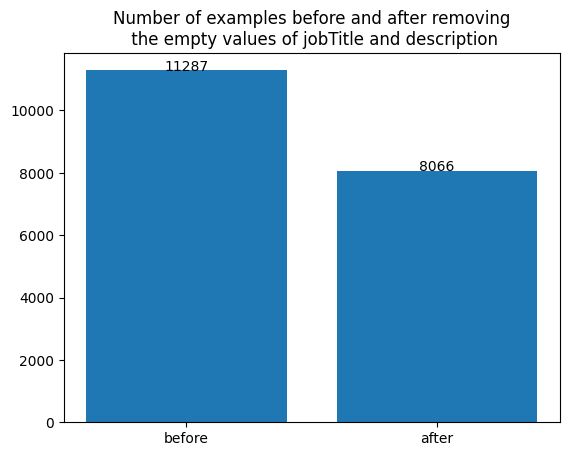

In [4]:
subset = dataFrame[['jobTitle', 'description']].copy()

subset.replace('', np.nan, inplace=True)
subset.dropna(inplace=True)

x = ["before","after"]
y = [len(dataFrame),len(subset)]

plt.bar(x,y)
plt.text(0, y[0], y[0], ha='center')
plt.text(1, y[1], y[1], ha='center')

plt.title('Number of examples before and after removing\n the empty values of jobTitle and description')
plt.show()

## Label distribution

Only 11 % of the dataset examples are likely related to AI (label 3 and 4).

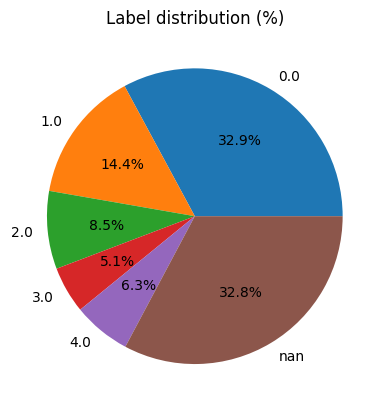

In [5]:
labelDistrib = (dataFrame.groupby('label', dropna=False).size() / len(dataFrame)) * 100
plt.pie(labelDistrib,labels=labelDistrib.keys(),autopct='%1.1f%%')
plt.title('Label distribution (%)')
plt.show()

## Description field size

Here we didn't count NaN values and we only consider string values.
Note that LinkedIn limit for jobTitle length is 100 characters and it's 2000 for the description

Most of the texts are short, for instance the median of the description length is 34 words.
183 texts contains less than 5 words (e.g. "stage d'observation").

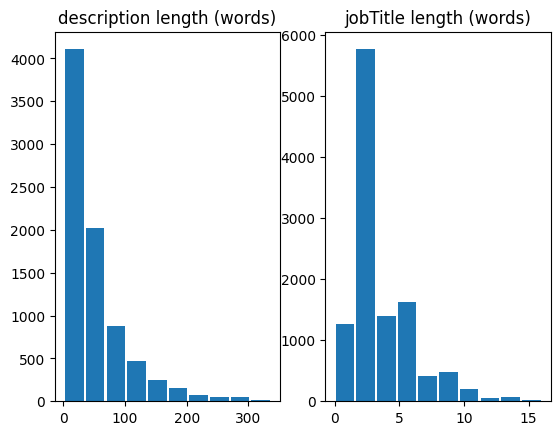

Median description size:  34 words
Min description size:  1 words
Max description size:  337 words
Number of values lesser than 5 words:  183

Median jobTitle size:  3 words
Min jobTitle size:  0 words
Max jobTitle size:  16 words


In [6]:
descriptionsSize = []
for s in dataFrame["description"]:
    if not (s is None) and type(s) == type(''):
        size = len(s.split())
        #if(size<3):
           # print(s)
        descriptionsSize.append(size)

descriptionsSize = np.array(descriptionsSize)
        
jobTitlesSize = []
for s in dataFrame["jobTitle"]:
    if not (s is None) and type(s) == type(''):
        size = len(s.split())
        jobTitlesSize.append(size)
        
jobTitlesSize = np.array(jobTitlesSize)


plt.subplot(1, 2, 1)
plt.hist(descriptionsSize, rwidth = 0.9)
plt.title('description length (words)')
plt.subplot(1, 2, 2)
plt.hist(jobTitlesSize, rwidth = 0.9)
plt.title('jobTitle length (words)')
plt.show()

print("Median description size: ",round(np.median(descriptionsSize)), "words")
print("Min description size: ",round(np.min(descriptionsSize)), "words")
print("Max description size: ",round(np.max(descriptionsSize)), "words")
print("Number of values lesser than 5 words: ",(descriptionsSize<5).sum())
print("")
print("Median jobTitle size: ",round(np.median(jobTitlesSize)), "words")
print("Min jobTitle size: ",round(np.min(jobTitlesSize)), "words")
print("Max jobTitle size: ",round(np.max(jobTitlesSize)), "words")

## Languages

Most of the work experience descriptions are written in french (more than 6000), a lot of them are in english (more than 1000) and at least one of them is in German.
Note that langdetect can only give a rough idea of the language but there are several errors (e.g. it detects italian instead of french)

In [7]:
from langdetect import detect

languages = {"not detected": 0}
for text in dataFrame['description']:
    if text is None or type(text) != type('') or len(text) <= 0:
        continue
    
    try:
        lang = detect(text)
        if lang in languages:
            languages[lang] +=1
        else:
            languages[lang] = 1
                
        #if(lang!='fr' and lang != 'en'):
           # print("START_",text,"_END")
    except:
        # the text could not be analyzed (maybe because it's an URL)
        languages["not detected"] += 1

print(languages)

{'not detected': 13, 'fr': 6481, 'en': 1503, 'ca': 12, 'it': 10, 'ro': 4, 'da': 2, 'no': 2, 'fi': 2, 'nl': 9, 'de': 13, 'pt': 3, 'id': 2, 'af': 3, 'tr': 1, 'es': 4, 'sv': 1, 'tl': 1}


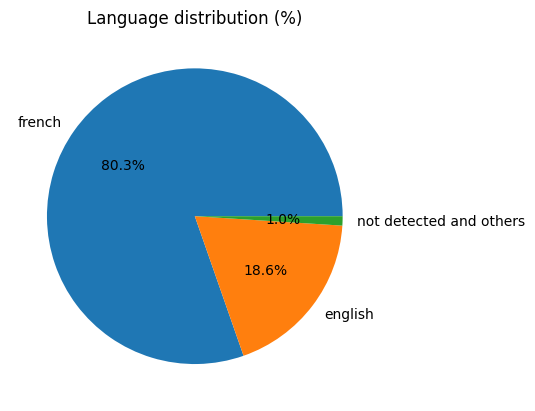

In [8]:
languagesAggregated = {
    'french' : languages['fr'],
    'english' : languages['en'],
    'not detected and others' : 0
}

for lang, nb in languages.items():
    if lang != 'fr' and lang != 'en':
        languagesAggregated['not detected and others'] += nb
    

plt.pie(languagesAggregated.values(),labels=languagesAggregated.keys(),autopct='%1.1f%%')
plt.title('Language distribution (%)')
plt.show()